# Experiment 1 : Grow of stables attractors fields in Aleatory CBN

This experiment explore the growth of local networks in CBN with Linear topology. Its important see what happened with the Linear CBN with more local networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("outputs/exp1_data_3_10_500/data.csv")
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_edges', 'step', 'method',
       'execution_time', 'n_local_attractors', 'n_pair_attractors',
       'n_attractor_fields'],
      dtype='object')

In [2]:
df.head(10)

,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_edges,step,method,execution_time,n_local_attractors,n_pair_attractors,n_attractor_fields
0,1,3,5,2,2,2,3,1,1,0.238364,7.0,NaN,NaN
1,1,3,5,2,2,2,3,1,2,0.244254,7.0,NaN,NaN
2,1,3,5,2,2,2,3,1,3,0.237981,7.0,NaN,NaN
3,1,3,5,2,2,2,3,2,1,0.000292,NaN,7.0,NaN
4,1,3,5,2,2,2,3,2,2,0.106582,NaN,7.0,NaN
5,1,3,5,2,2,2,3,2,3,0.105521,NaN,7.0,NaN
6,1,3,5,2,2,2,3,3,1,0.000235,NaN,NaN,1.0
7,1,3,5,2,2,2,3,3,2,0.186492,NaN,NaN,1.0
8,1,3,5,2,2,2,3,3,3,0.195358,NaN,NaN,1.0
9,1,4,5,2,2,2,4,1,1,0.262275,9.0,NaN,NaN


## General Statistics

### Statistics

In [3]:
# Compute mean execution times grouped by method, step, and number of local networks
mean_times = df.groupby(['step', 'method', 'n_local_networks'])['execution_time'].mean().reset_index()

# Sort the values before pivoting
mean_times = mean_times.sort_values(by=['step', 'method'])

# Pivot the table to have columns for each n_local_networks
table = mean_times.pivot(index=['step', 'method'], columns='n_local_networks', values='execution_time')

# Print the table
table

n_local_networks        3         4         5         6         7         8   \
step method                                                                    
1    1            0.227709  0.307202  0.394715  0.487626  0.572189  0.660422   
     2            0.680136  0.708195  0.725005  0.726182  0.728595  0.728914   
     3            0.690318  0.717942  0.721626  0.720972  0.734707  0.715275   
2    1            0.000233  0.000292  0.000359  0.000434  0.000502  0.000580   
     2            0.581266  0.582121  0.578163  0.577420  0.589304  0.578710   
     3            0.573896  0.581911  0.579789  0.576634  0.584367  0.579374   
3    1            0.001146  0.007297  0.037764  0.217700  1.309175  2.935454   
     2            1.085924  1.654180  2.275027  2.896726  3.925606  5.177156   
     3            1.076074  1.629794  2.210023  2.849315  3.882457  5.162633   

n_local_networks         9           10  
step method                              
1    1             0.748511    0.836800  
     2             0.702926    0.704991  
     3             0.708919    0.711798  
2    1             0.000664    0.000733  
     2             0.566100    0.570319  
     3             0.564982    0.571232  
3    1            12.761020  110.744971  
     2            10.043624   58.490862  
     3            10.515866   61.991702

### Boxplots and Violin Plots

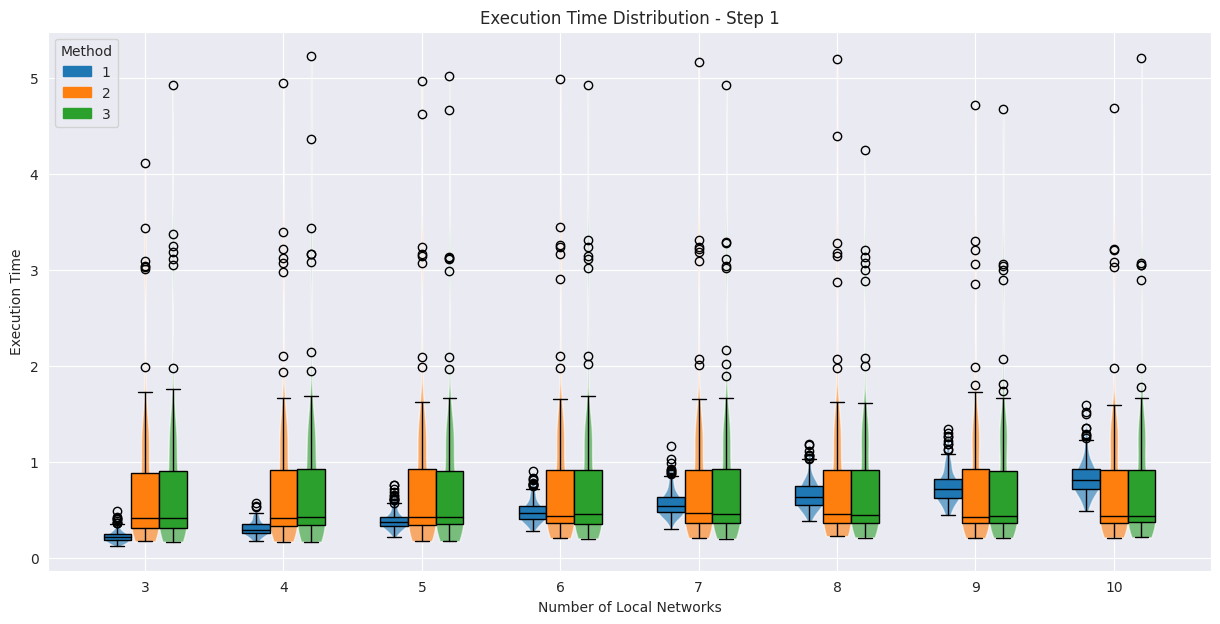

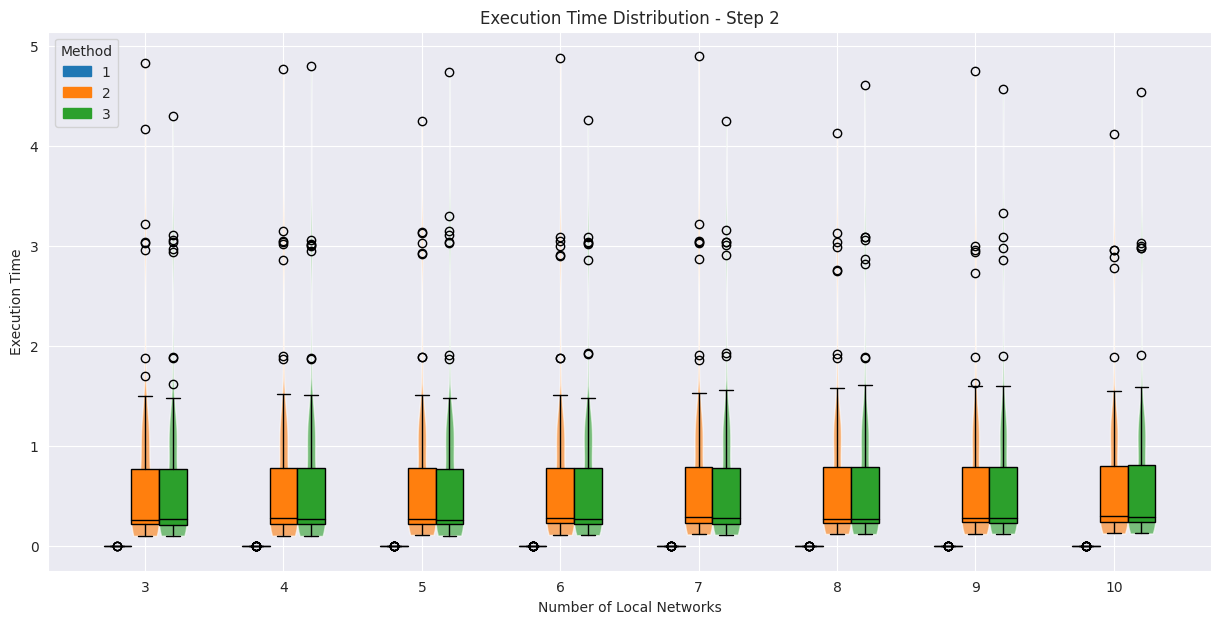

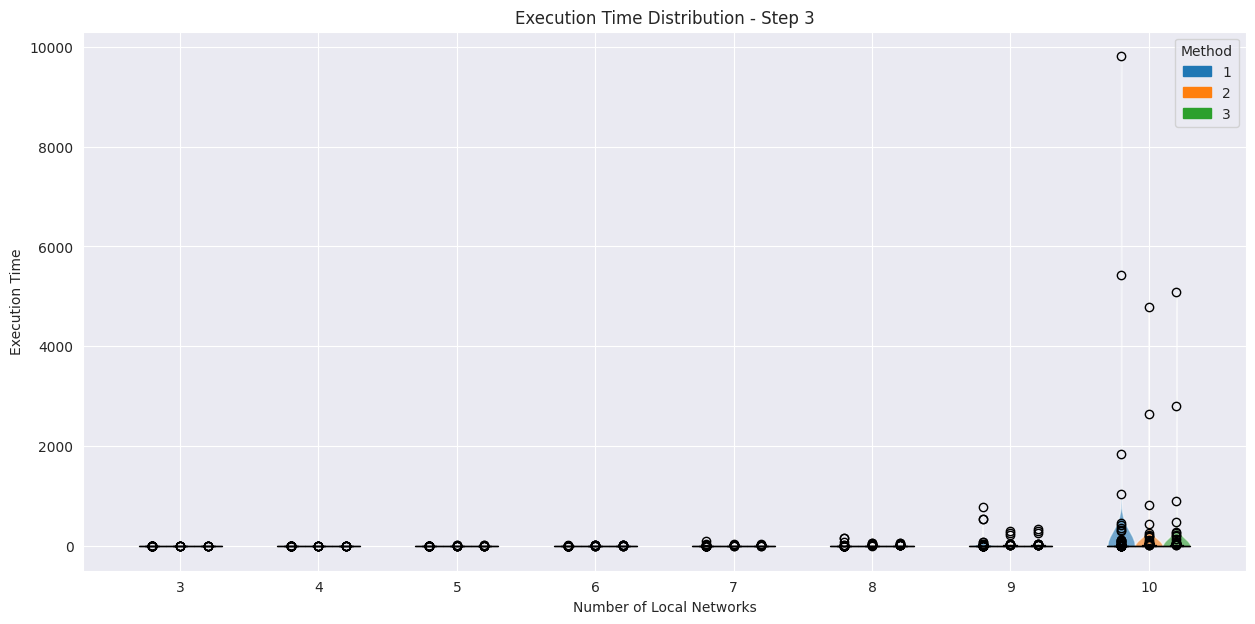

In [4]:
# Unique values for steps and methods
steps = sorted(df['step'].unique())
methods = df['method'].unique()
n_local_networks_values = sorted(df['n_local_networks'].unique())

# Plot boxplots and violin plots
for step in steps:
    fig, ax = plt.subplots(figsize=(15, 7))
    positions = np.arange(len(n_local_networks_values))  # X positions
    width = 0.2  # Width of each box/violin

    # Boxplots
    for i, method in enumerate(methods):
        data = [df[(df['step'] == step) & (df['method'] == method) & (df['n_local_networks'] == n)]
                ['execution_time'].dropna() for n in n_local_networks_values]
        ax.boxplot(data, positions=positions + i * width - width, widths=width, patch_artist=True,
                   boxprops=dict(facecolor=f"C{i}"), medianprops=dict(color='black'))

    # Violin plots
    for i, method in enumerate(methods):
        data = [df[(df['step'] == step) & (df['method'] == method) & (df['n_local_networks'] == n)]
                ['execution_time'].dropna().values for n in n_local_networks_values]
        parts = ax.violinplot(data, positions=positions + i * width - width, widths=width, showmeans=False,
                              showextrema=False, showmedians=False)
        for pc in parts['bodies']:
            pc.set_facecolor(f"C{i}")
            pc.set_alpha(0.6)

    ax.set_xticks(positions)
    ax.set_xticklabels(n_local_networks_values)
    ax.set_xlabel("Number of Local Networks")
    ax.set_ylabel("Execution Time")
    ax.set_title(f"Execution Time Distribution - Step {step}")
    ax.legend([plt.Rectangle((0, 0), 1, 1, color=f"C{i}") for i in range(len(methods))], methods, title="Method")

    plt.show()

### Histograms

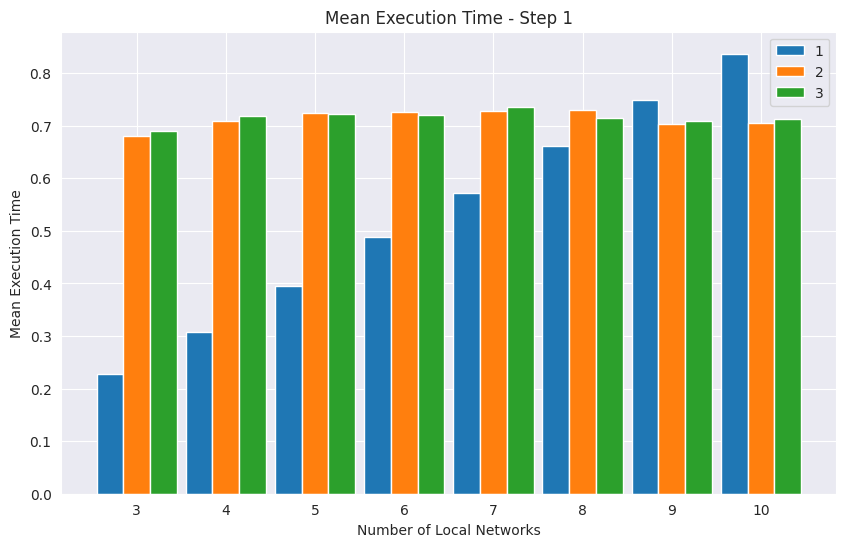

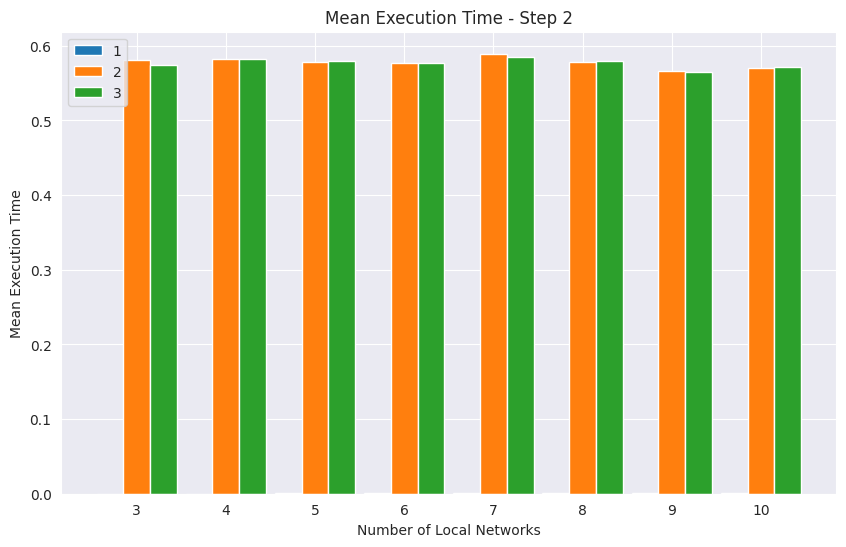

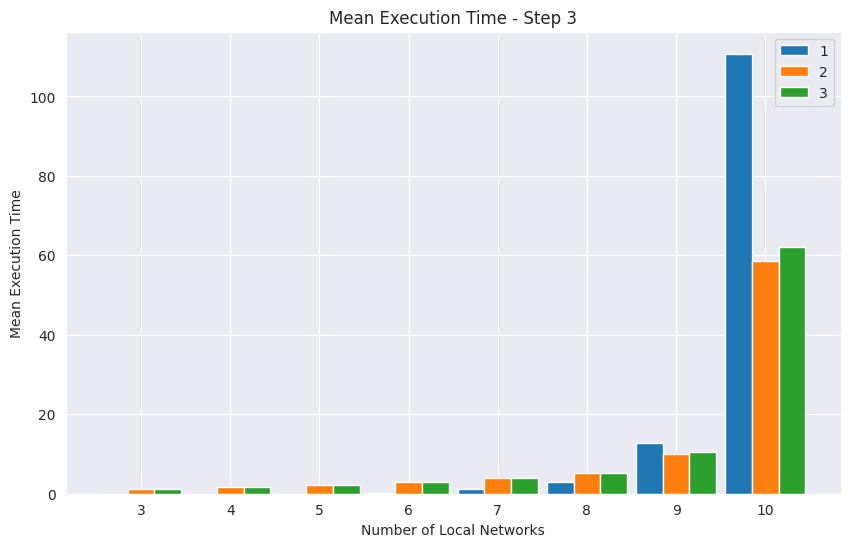

In [5]:
# Create boxplots and violin plots for execution times grouped by step and method
unique_steps = df['step'].unique()
unique_methods = df['method'].unique()
unique_n_local_networks = sorted(df['n_local_networks'].unique())

# Create histograms for mean execution times per step
for step in unique_steps:
    fig, ax = plt.subplots(figsize=(10, 6))
    data_step = mean_times[mean_times['step'] == step]

    width = 0.3  # Width of each bar
    positions = np.arange(len(unique_n_local_networks))

    for i, method in enumerate(unique_methods):
        means = [data_step[(data_step['n_local_networks'] == n) & (data_step['method'] == method)]['execution_time'].values[0] if not data_step[(data_step['n_local_networks'] == n) & (data_step['method'] == method)].empty else 0 for n in unique_n_local_networks]
        ax.bar(positions + i * width, means, width=width, label=method, color=f"C{i}")

    ax.set_xticks(positions + width)
    ax.set_xticklabels(unique_n_local_networks)
    ax.set_xlabel("Number of Local Networks")
    ax.set_ylabel("Mean Execution Time")
    ax.set_title(f"Mean Execution Time - Step {step}")
    ax.legend()
    plt.show()


# Comparison of the number of attractor fields

In [6]:
df['n_attractor_fields'].max()

9789600.0

In [7]:
df['n_pair_attractors'].max()

1275.0

### Bloxplots and Violin Diagrams

### Incremental Taxs

### Top 20

### Dispersion Graph

In [8]:
# Create a scatter plot
plt.scatter(df['n_time_find_fields'], df['n_attractor_fields'])
plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot between time and number of attractor fields')
plt.show()

KeyError: 'n_time_find_fields'

### Power-Law Distribution

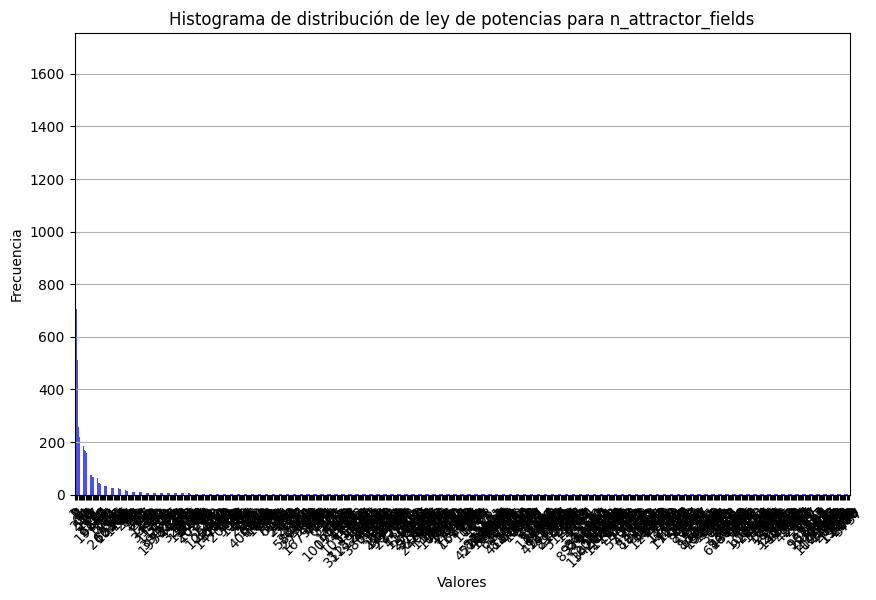

In [13]:
# Calcular el histograma de frecuencias
histogram = df['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## Specific Statistics

### Local Networks = 9

In [14]:
# Filtrar el DataFrame por 'n_local_networks' igual a 11
df_filtered = df[df['n_local_networks'] == 9]

# Seleccionar las columnas requeridas
df_filtered_resume = df_filtered[['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]

# Describe the DataFrame to summarize statistics
df_filtered_resume = df_filtered_resume.describe()
df_filtered_resume

,n_local_attractors,n_pair_attractors,n_attractor_fields
count,1000.000000,1000.000000,1.000000e+03
mean,38.913000,125.568000,6.525612e+05
std,18.194408,161.804599,1.114932e+07
min,18.000000,0.000000,0.000000e+00
25%,22.000000,32.000000,1.000000e+00
50%,35.000000,75.000000,4.450000e+01
75%,47.000000,154.500000,1.152000e+03
max,147.000000,1629.000000,3.121247e+08


In [15]:
# Cambiar los nombres de las columnas y ponerlos en negrita
df_filtered_resume.columns = ['\\textbf{Local Attractors}', '\\textbf{Attractor Pairs}', '\\textbf{Attractor Fields}']

# Formatear los valores a dos decimales
stats_formatted = df_filtered_resume.applymap(lambda x: f"{x:.2f}")

# Exportar las estadísticas descriptivas a una tabla LaTeX centrada
latex_text = stats_formatted.to_latex(
    index=True,          # Incluir el índice
    bold_rows=True,      # Hacer el índice en negrita
    column_format='lccc',  # Formato de las columnas (l: izquierda, c: centro, r: derecha)
    header=True,         # Incluir encabezados de columnas
    caption='',          # Leyenda en blanco
    label=''             # Etiqueta en blanco
)

# Escapar el carácter '%' en la cadena de LaTeX
latex_text_escaped = latex_text.replace('%', r'\%')

# Añadir el entorno para centrar la tabla
latex_text_centered = "\\begin{table}[ht]\n\\centering\n" + latex_text_escaped + "\\end{table}"

# Imprimir la tabla centrada
print(latex_text_centered)

\begin{table}[ht]
\centering
\begin{tabular}{lccc}
\toprule
 & \textbf{Local Attractors} & \textbf{Attractor Pairs} & \textbf{Attractor Fields} \\
\midrule
\textbf{count} & 1000.00 & 1000.00 & 1000.00 \\
\textbf{mean} & 38.91 & 125.57 & 652561.23 \\
\textbf{std} & 18.19 & 161.80 & 11149319.51 \\
\textbf{min} & 18.00 & 0.00 & 0.00 \\
\textbf{25\%} & 22.00 & 32.00 & 1.00 \\
\textbf{50\%} & 35.00 & 75.00 & 44.50 \\
\textbf{75\%} & 47.00 & 154.50 & 1152.00 \\
\textbf{max} & 147.00 & 1629.00 & 312124688.00 \\
\bottomrule
\end{tabular}
\end{table}
